<a href="https://colab.research.google.com/github/aarsanjani/meansquares/blob/master/version2/feature_engineering/CA_PCA_Analysis_SupersetData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Goal**

Dimensionality Reduction using PCA on CA Superset timeseries data


## Mount Google drive

In [1]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [2]:
!ls '/content/drive/Shared drives/CMPE 295- Master Project/projectdata-2021'

 CA_alldatasets_Feb05.csv
 CA_alldatasets_Jan13.csv
 CA_CombinedData_Labeled_CDCGuideline_Feb05.csv
 CA_CombinedData_Labeled_CDCGuideline_Feb06.csv
 CA_CombinedData_Labeled_CDCGuideline_Jan15.csv
 CA_combined_Feb04.csv
 CA_CovidDataJan10.csv
 CA_dataset_Feb11.csv
 CA_GoogleMobilityDataJan10.csv
 CA_MarylandData_Labeled_CDCGuideline_Feb05.csv
 CA_MarylandData_Labeled_CDCGuideline_Feb06.csv
 CA_MarylandData_Labeled_CDCGuideline_Jan15.csv
 CA_processedMarylandData_Feb04.csv
 CA_processedMarylandData_Feb05.csv
 CA_processedMarylandData_Feb12.csv
 CA_processedMarylandData_Jan11.csv
 CA_SocialDistancingDataJan10.csv
 CA_socialDistancingInertiaData_Feb04.csv
 CA_Superset_dataset_Feb12.csv
 computed_CA_mobility_data.csv
 data-mask_for_all.csv
 election_results_2021.csv
 maryland_inertia_data_allstates_Feb04.csv
 maryland_inertia_data_allstates_Feb05.csv
 maryland_inertia_data_allstates_Feb12.csv
 maryland_inertia_data_allstates_Jan11.csv
 maryland_inertia_raw_dec28_2020.csv
 Mask_Rule_Feb05.cs

# Import library

In [3]:
%matplotlib inline
import pandas as pd # for using pandas daraframe
import numpy as np # for som math operations
from sklearn.preprocessing import StandardScaler # for standardizing the Data
from sklearn.decomposition import PCA # for PCA calculation
import matplotlib.pyplot as plt # for plotting

import seaborn as sns


# Load Superset data

In [145]:
CA_superset_data = pd.read_csv('/content/drive/Shared drives/CMPE 295- Master Project/projectdata-2021/CA_Superset_dataset_Feb12.csv',low_memory=False)
CA_superset_data.head()

,Date,Province_State,FIPS,New cases,County Name,mask_rule_severity,m50,m50_index,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,PopDensity,State_Name,State,CTFIPS,CTNAME,STFIPS,Social.distancing.index,X..staying.home,Trips.person,X..out.of.county.trips,X..out.of.state.trips,Miles.person,Work.trips.person,Non.work.trips.person,New.COVID.cases,Population,X..change.in.consumption,Transit.mode.share,X..people.older.than.60,Median.income,X..African.Americans,X..Hispanic.Americans,X..Male,Employment.density,X..hot.spots.1000.people,Hospital.beds.1000.people,ICUs.1000.people,X..contact.tracing.workers.1000.people,New.cases.1000.people,Active.cases.1000.people,X.days..decreasing.COVID.cases,X..hospital.bed.utilization,Testing.capacity,Tests.done.1000.people,X..ICU.utilization,Ventilator.shortage,Imported.COVID.cases,COVID.exposure.1000.people,X.days..decreasing.ILI.cases,Unemployment.claims.1000.people,Unemployment.rate,X..working.from.home,Cumulative.inflation.rate,COVID.death.rate
0,2020-03-01,California,6001,0,Alameda County,0.0,3.684,58,6.0,9.0,15.0,1.0,4.0,0.0,860.757075,California,CA,6001,Alameda County,6,37,26,2.93,25.4,0.4,36.8,0.25,2.68,0,1666753,-5.1,15.04,19,92574,10.5,22.5,49.11,1155,131,2.05,0.22,NaN,0.0000,0.0,37,54.0,0.0,0.00,0.0,0,0,0.05,35,1.1,5.3,5.7,0.6,0.00
1,2020-03-02,California,6001,0,Alameda County,0.0,6.182,98,4.0,7.0,7.0,-1.0,3.0,0.0,860.757075,California,CA,6001,Alameda County,6,17,20,3.38,28.2,0.4,38.1,0.63,2.74,0,1666753,-2.9,15.04,19,92574,10.5,22.5,49.11,1155,131,2.05,0.22,NaN,0.0000,0.0,38,54.0,0.0,0.00,0.0,0,0,0.05,35,1.1,5.3,5.7,0.6,0.00
2,2020-03-03,California,6001,1,Alameda County,0.0,6.271,100,5.0,12.0,41.0,0.0,1.0,-1.0,860.757075,California,CA,6001,Alameda County,6,16,18,3.61,27.1,0.3,32.7,0.67,2.94,1,1666753,4.1,15.04,19,92574,10.5,22.5,49.11,1155,131,2.05,0.22,NaN,0.0002,0.0,0,54.0,0.0,0.00,0.0,0,1,0.05,42,1.1,5.3,5.7,0.6,0.00
3,2020-03-04,California,6001,0,Alameda County,0.0,6.209,99,1.0,6.0,23.0,-3.0,1.0,0.0,860.757075,California,CA,6001,Alameda County,6,14,18,3.55,27.9,0.3,36.9,0.68,2.87,0,1666753,1.7,15.04,19,92574,10.5,22.5,49.11,1155,131,2.05,0.22,NaN,0.0002,0.0,0,54.0,10.3,0.01,0.0,0,1,0.06,42,1.1,5.3,5.7,0.6,0.04
4,2020-03-05,California,6001,0,Alameda County,0.0,6.654,106,1.0,6.0,12.0,-5.0,-1.0,1.0,860.757075,California,CA,6001,Alameda County,6,15,19,3.54,28.1,0.3,36.8,0.66,2.88,0,1666753,2.0,15.04,19,92574,10.5,22.5,49.11,1155,131,2.05,0.22,NaN,0.0002,0.0,0,54.0,10.3,0.01,0.0,0,1,0.06,42,1.1,5.3,5.7,0.6,0.04


## Factor Plot

In [ ]:
sns.factorplot(data = CA_superset_data, x = 'New.cases.1000.people', y = "m50_index", 
               #col = 'Promo', 
               row = 'FIPS',
               hue = 'FIPS',
               palette = 'RdPu') 

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


## Preprocessing: Convert 'date' as index column before applying PCA

In [47]:
CA_superset_data['Date'] = pd.to_datetime(CA_superset_data['Date'], format='%Y-%m-%d') 


In [48]:
CA_superset_data = CA_superset_data.set_index('Date')
CA_superset_data.head()

,Province_State,FIPS,New cases,County Name,mask_rule_severity,m50,m50_index,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,PopDensity,State_Name,State,CTFIPS,CTNAME,STFIPS,Social.distancing.index,X..staying.home,Trips.person,X..out.of.county.trips,X..out.of.state.trips,Miles.person,Work.trips.person,Non.work.trips.person,New.COVID.cases,Population,X..change.in.consumption,Transit.mode.share,X..people.older.than.60,Median.income,X..African.Americans,X..Hispanic.Americans,X..Male,Employment.density,X..hot.spots.1000.people,Hospital.beds.1000.people,ICUs.1000.people,X..contact.tracing.workers.1000.people,New.cases.1000.people,Active.cases.1000.people,X.days..decreasing.COVID.cases,X..hospital.bed.utilization,Testing.capacity,Tests.done.1000.people,X..ICU.utilization,Ventilator.shortage,Imported.COVID.cases,COVID.exposure.1000.people,X.days..decreasing.ILI.cases,Unemployment.claims.1000.people,Unemployment.rate,X..working.from.home,Cumulative.inflation.rate,COVID.death.rate
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-03-01,California,6001,0,Alameda County,0.0,3.684,58,6.0,9.0,15.0,1.0,4.0,0.0,860.757075,California,CA,6001,Alameda County,6,37,26,2.93,25.4,0.4,36.8,0.25,2.68,0,1666753,-5.1,15.04,19,92574,10.5,22.5,49.11,1155,131,2.05,0.22,NaN,0.0000,0.0,37,54.0,0.0,0.00,0.0,0,0,0.05,35,1.1,5.3,5.7,0.6,0.00
2020-03-02,California,6001,0,Alameda County,0.0,6.182,98,4.0,7.0,7.0,-1.0,3.0,0.0,860.757075,California,CA,6001,Alameda County,6,17,20,3.38,28.2,0.4,38.1,0.63,2.74,0,1666753,-2.9,15.04,19,92574,10.5,22.5,49.11,1155,131,2.05,0.22,NaN,0.0000,0.0,38,54.0,0.0,0.00,0.0,0,0,0.05,35,1.1,5.3,5.7,0.6,0.00
2020-03-03,California,6001,1,Alameda County,0.0,6.271,100,5.0,12.0,41.0,0.0,1.0,-1.0,860.757075,California,CA,6001,Alameda County,6,16,18,3.61,27.1,0.3,32.7,0.67,2.94,1,1666753,4.1,15.04,19,92574,10.5,22.5,49.11,1155,131,2.05,0.22,NaN,0.0002,0.0,0,54.0,0.0,0.00,0.0,0,1,0.05,42,1.1,5.3,5.7,0.6,0.00
2020-03-04,California,6001,0,Alameda County,0.0,6.209,99,1.0,6.0,23.0,-3.0,1.0,0.0,860.757075,California,CA,6001,Alameda County,6,14,18,3.55,27.9,0.3,36.9,0.68,2.87,0,1666753,1.7,15.04,19,92574,10.5,22.5,49.11,1155,131,2.05,0.22,NaN,0.0002,0.0,0,54.0,10.3,0.01,0.0,0,1,0.06,42,1.1,5.3,5.7,0.6,0.04
2020-03-05,California,6001,0,Alameda County,0.0,6.654,106,1.0,6.0,12.0,-5.0,-1.0,1.0,860.757075,California,CA,6001,Alameda County,6,15,19,3.54,28.1,0.3,36.8,0.66,2.88,0,1666753,2.0,15.04,19,92574,10.5,22.5,49.11,1155,131,2.05,0.22,NaN,0.0002,0.0,0,54.0,10.3,0.01,0.0,0,1,0.06,42,1.1,5.3,5.7,0.6,0.04


## Group the data

In [51]:
CA_superset_data.columns

Index(['Province_State', 'FIPS', 'New cases', 'County Name',
       'mask_rule_severity', 'm50', 'm50_index',
       'retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline', 'PopDensity', 'State_Name',
       'State', 'CTFIPS', 'CTNAME', 'STFIPS', 'Social.distancing.index',
       'X..staying.home', 'Trips.person', 'X..out.of.county.trips',
       'X..out.of.state.trips', 'Miles.person', 'Work.trips.person',
       'Non.work.trips.person', 'New.COVID.cases', 'Population',
       'X..change.in.consumption', 'Transit.mode.share',
       'X..people.older.than.60', 'Median.income', 'X..African.Americans',
       'X..Hispanic.Americans', 'X..Male', 'Employment.density',
       'X..hot.spots.1000.people', 'Hospital.beds.1000.people',
   

In [52]:
x_col_demographics = ['FIPS','PopDensity','X..people.older.than.60',
                      'Median.income', 'X..African.Americans',
                      'X..Hispanic.Americans', 'X..Male','New cases','New.cases.1000.people']

In [74]:
x_col_hospitalization_testing = ['Hospital.beds.1000.people',
       'ICUs.1000.people', 
       'X..hospital.bed.utilization',
       'Testing.capacity', 'Tests.done.1000.people', 'X..ICU.utilization',
       'Ventilator.shortage','New cases','New.cases.1000.people'] #'X..contact.tracing.workers.1000.people',

In [54]:
x_col_mobility = ['retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline','parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline','workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline',
       'X..staying.home', 'Trips.person', 'X..out.of.county.trips',
       'X..out.of.state.trips', 'Miles.person', 'Work.trips.person',
       'Non.work.trips.person','X..working.from.home','New cases','New.cases.1000.people']

In [55]:
x_col_socialdistancing = ['m50', 'm50_index','Social.distancing.index','New cases','New.cases.1000.people']

In [56]:
x_col_maskrule = ['mask_rule_severity','New cases','New.cases.1000.people']

# PCA: Demographic Group

In [133]:
CA_superset_data_filtered = CA_superset_data[x_col_demographics]
CA_superset_data_filtered.head()

,FIPS,PopDensity,X..people.older.than.60,Median.income,X..African.Americans,X..Hispanic.Americans,X..Male,New cases,New.cases.1000.people
Date,,,,,,,,,
2020-03-01,6001,860.757075,19,92574,10.5,22.5,49.11,0,0.0000
2020-03-02,6001,860.757075,19,92574,10.5,22.5,49.11,0,0.0000
2020-03-03,6001,860.757075,19,92574,10.5,22.5,49.11,1,0.0002
2020-03-04,6001,860.757075,19,92574,10.5,22.5,49.11,0,0.0002
2020-03-05,6001,860.757075,19,92574,10.5,22.5,49.11,0,0.0002


In [134]:
print(CA_superset_data_filtered.shape)
CA_superset_data_filtered = CA_superset_data_filtered.dropna()
print(CA_superset_data_filtered.shape)

(15391, 9)
(15391, 9)


## Correlation Plot

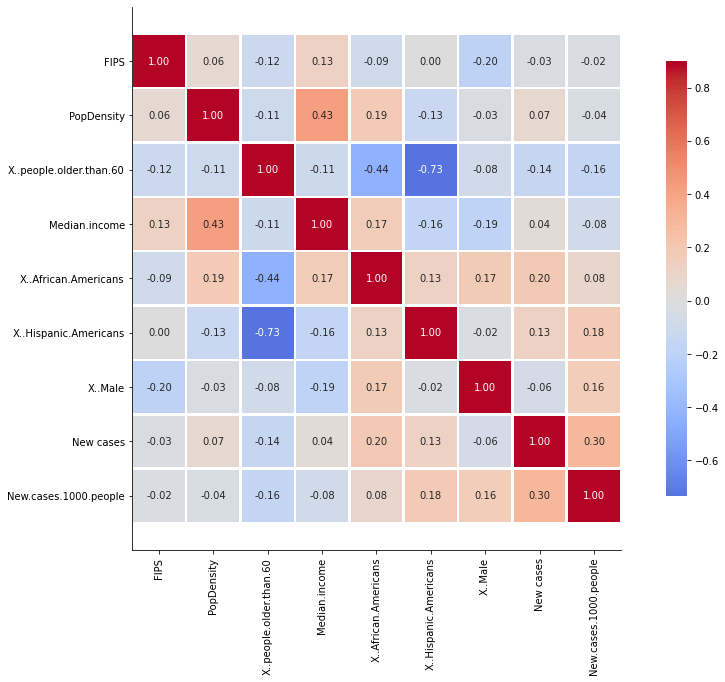

In [135]:

corr = CA_superset_data_filtered.corr()
g = sns.heatmap(corr, vmax=.9, center=0,
               square=True, linewidths=1.5, cbar_kws={"shrink": .8}, annot=True, fmt='.2f', cmap='coolwarm')
bottom, top = g.get_ylim()
g.set_ylim(bottom + 0.5, top - 0.5)
sns.despine()
g.figure.set_size_inches(16, 10)

## Standardizing the data

In [136]:
X = CA_superset_data_filtered.values # getting all values as a matrix of dataframe 
sc = StandardScaler() # creating a StandardScaler object
X_std = sc.fit_transform(X) # standardizing the data

## Apply PCA

In [137]:
pca = PCA()
X_pca = pca.fit(X_std)

## Determine the number of components

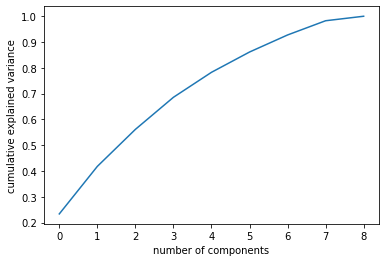

In [138]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

## Dimensionality Reduction

In [139]:
num_components = 7
pca = PCA(num_components)  
X_pca = pca.fit_transform(X_std) # fit and reduce dimension

## Important feature set

In [140]:
pd.DataFrame(pca.components_, columns = CA_superset_data_filtered.columns)


,FIPS,PopDensity,X..people.older.than.60,Median.income,X..African.Americans,X..Hispanic.Americans,X..Male,New cases,New.cases.1000.people
0,0.011703,0.097211,-0.607513,0.057242,0.415698,0.511488,0.111266,0.294271,0.290971
1,-0.247045,-0.570619,0.037215,-0.637119,-0.190083,0.233543,0.271885,-0.038781,0.199895
2,-0.517833,0.234642,0.220283,0.051234,0.336838,-0.381164,0.545101,0.162867,0.207930
3,0.157940,-0.043654,0.254438,0.008150,-0.222331,-0.142494,-0.305492,0.666232,0.549016
4,-0.683352,-0.085008,0.024331,0.009233,0.096754,0.146466,-0.521104,0.282975,-0.377742
5,0.388097,-0.392313,0.063109,-0.195484,0.576380,-0.279674,0.027890,0.316388,-0.376781
6,0.119705,0.562770,-0.014456,-0.480991,-0.279481,0.116095,0.215088,0.377026,-0.396736


In [141]:

n_pcs= pca.n_components_ # get number of component
# get the index of the most important feature on EACH component
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]
initial_feature_names = CA_superset_data_filtered.columns
# get the most important feature names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

In [142]:
most_important_names

['X..people.older.than.60',
 'Median.income',
 'X..Male',
 'New cases',
 'FIPS',
 'X..African.Americans',
 'PopDensity']

In [143]:
print(" initial_feature_names : ",initial_feature_names)

print("most_important_names: ", most_important_names)

print(len(initial_feature_names) - len(most_important_names))

 initial_feature_names :  Index(['FIPS', 'PopDensity', 'X..people.older.than.60', 'Median.income',
       'X..African.Americans', 'X..Hispanic.Americans', 'X..Male', 'New cases',
       'New.cases.1000.people'],
      dtype='object')
most_important_names:  ['X..people.older.than.60', 'Median.income', 'X..Male', 'New cases', 'FIPS', 'X..African.Americans', 'PopDensity']
2


# PCA: Hospitalization and testing  Group

In [111]:
CA_superset_data_filtered = CA_superset_data[x_col_hospitalization_testing]
CA_superset_data_filtered.head()

,Hospital.beds.1000.people,ICUs.1000.people,X..hospital.bed.utilization,Testing.capacity,Tests.done.1000.people,X..ICU.utilization,Ventilator.shortage,New cases,New.cases.1000.people
Date,,,,,,,,,
2020-03-01,2.05,0.22,54.0,0.0,0.00,0.0,0,0,0.0000
2020-03-02,2.05,0.22,54.0,0.0,0.00,0.0,0,0,0.0000
2020-03-03,2.05,0.22,54.0,0.0,0.00,0.0,0,1,0.0002
2020-03-04,2.05,0.22,54.0,10.3,0.01,0.0,0,0,0.0002
2020-03-05,2.05,0.22,54.0,10.3,0.01,0.0,0,0,0.0002


In [112]:
print(CA_superset_data_filtered.shape)
CA_superset_data_filtered = CA_superset_data_filtered.dropna()
print(CA_superset_data_filtered.shape)

(15391, 9)
(15391, 9)


## Correlation Plot

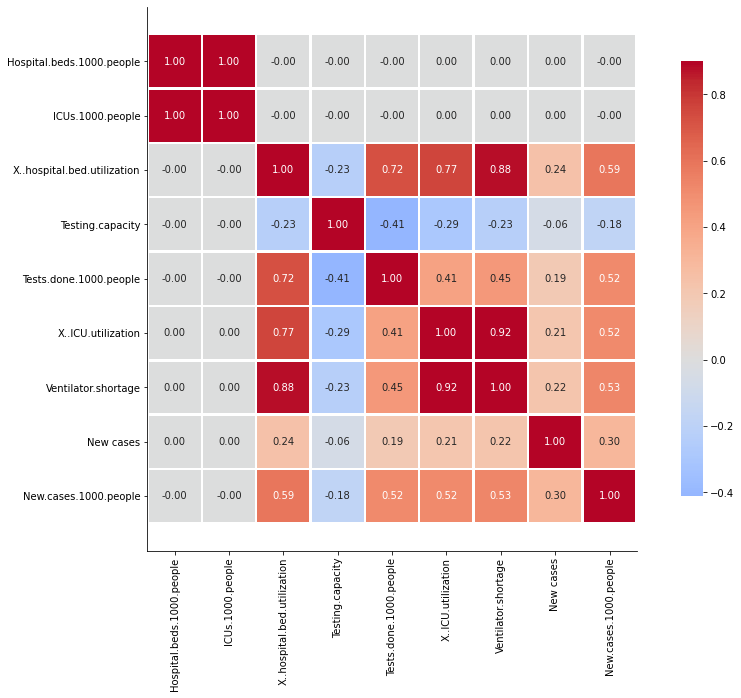

In [113]:

corr = CA_superset_data_filtered.corr()
g = sns.heatmap(corr, vmax=.9, center=0,
               square=True, linewidths=1.5, cbar_kws={"shrink": .8}, annot=True, fmt='.2f', cmap='coolwarm')
bottom, top = g.get_ylim()
g.set_ylim(bottom + 0.5, top - 0.5)
sns.despine()
g.figure.set_size_inches(16, 10)

## Standardizing the data

In [114]:
X = CA_superset_data_filtered.values # getting all values as a matrix of dataframe 
sc = StandardScaler() # creating a StandardScaler object
X_std = sc.fit_transform(X) # standardizing the data

## Apply PCA

In [115]:
pca = PCA()
X_pca = pca.fit(X_std)

## Determine the number of components

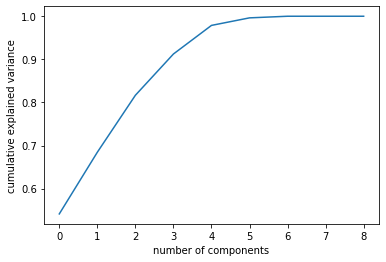

In [116]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

## Dimensionality Reduction

In [117]:
num_components = 4
pca = PCA(num_components)  
X_pca = pca.fit_transform(X_std) # fit and reduce dimension

## Important feature set

In [118]:
pd.DataFrame(pca.components_, columns = CA_superset_data_filtered.columns)


,Hospital.beds.1000.people,ICUs.1000.people,X..hospital.bed.utilization,Testing.capacity,Tests.done.1000.people,X..ICU.utilization,Ventilator.shortage,New cases,New.cases.1000.people
0,0.0,0.000000e+00,0.479079,-0.207391,0.377746,0.444018,0.461535,0.184441,0.374960
1,0.0,3.563230e-16,0.052890,0.774421,-0.323995,0.096214,0.145019,0.488177,0.154590
2,-0.0,-1.591609e-16,-0.157130,-0.311298,0.235704,-0.304998,-0.328020,0.768454,0.178057
3,-0.0,7.264155e-18,-0.140714,-0.424283,-0.529388,0.373223,0.265006,0.327427,-0.450777


In [119]:

n_pcs= pca.n_components_ # get number of component
# get the index of the most important feature on EACH component
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]
initial_feature_names = CA_superset_data_filtered.columns
# get the most important feature names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

In [120]:
most_important_names

['X..hospital.bed.utilization',
 'Testing.capacity',
 'New cases',
 'Tests.done.1000.people']

In [121]:
print(" initial_feature_names : ",initial_feature_names)

print("most_important_names: ", most_important_names)

print(len(initial_feature_names) - len(most_important_names))

 initial_feature_names :  Index(['Hospital.beds.1000.people', 'ICUs.1000.people',
       'X..hospital.bed.utilization', 'Testing.capacity',
       'Tests.done.1000.people', 'X..ICU.utilization', 'Ventilator.shortage',
       'New cases', 'New.cases.1000.people'],
      dtype='object')
most_important_names:  ['X..hospital.bed.utilization', 'Testing.capacity', 'New cases', 'Tests.done.1000.people']
5


# PCA: Mobility Group

In [122]:
CA_superset_data_filtered = CA_superset_data[x_col_mobility]
CA_superset_data_filtered.head()

,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,X..staying.home,Trips.person,X..out.of.county.trips,X..out.of.state.trips,Miles.person,Work.trips.person,Non.work.trips.person,X..working.from.home,New cases,New.cases.1000.people
Date,,,,,,,,,,,,,,,,
2020-03-01,6.0,9.0,15.0,1.0,4.0,0.0,26,2.93,25.4,0.4,36.8,0.25,2.68,5.7,0,0.0000
2020-03-02,4.0,7.0,7.0,-1.0,3.0,0.0,20,3.38,28.2,0.4,38.1,0.63,2.74,5.7,0,0.0000
2020-03-03,5.0,12.0,41.0,0.0,1.0,-1.0,18,3.61,27.1,0.3,32.7,0.67,2.94,5.7,1,0.0002
2020-03-04,1.0,6.0,23.0,-3.0,1.0,0.0,18,3.55,27.9,0.3,36.9,0.68,2.87,5.7,0,0.0002
2020-03-05,1.0,6.0,12.0,-5.0,-1.0,1.0,19,3.54,28.1,0.3,36.8,0.66,2.88,5.7,0,0.0002


In [123]:
print(CA_superset_data_filtered.shape)
CA_superset_data_filtered = CA_superset_data_filtered.dropna()
print(CA_superset_data_filtered.shape)

(15391, 16)
(10179, 16)


## Correlation Plot

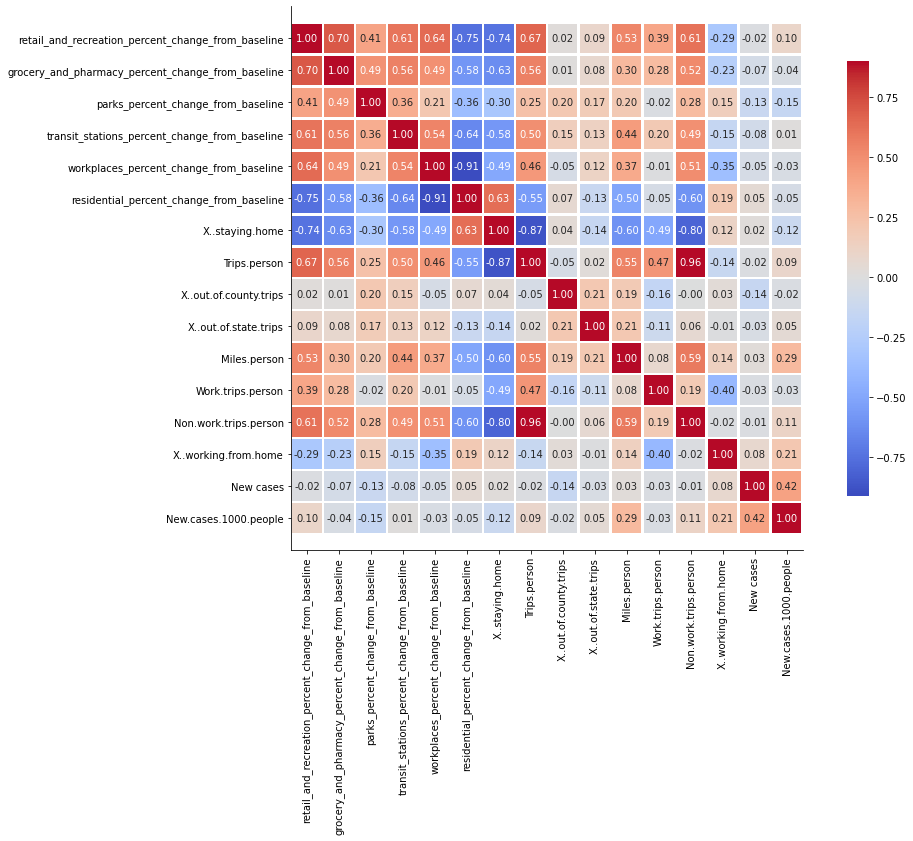

In [124]:

corr = CA_superset_data_filtered.corr()
g = sns.heatmap(corr, vmax=.9, center=0,
               square=True, linewidths=1.5, cbar_kws={"shrink": .8}, annot=True, fmt='.2f', cmap='coolwarm')
bottom, top = g.get_ylim()
g.set_ylim(bottom + 0.5, top - 0.5)
sns.despine()
g.figure.set_size_inches(16, 10)

## Standardizing the data

In [125]:
X = CA_superset_data_filtered.values # getting all values as a matrix of dataframe 
sc = StandardScaler() # creating a StandardScaler object
X_std = sc.fit_transform(X) # standardizing the data

## Apply PCA

In [126]:
pca = PCA()
X_pca = pca.fit(X_std)

## Determine the number of components

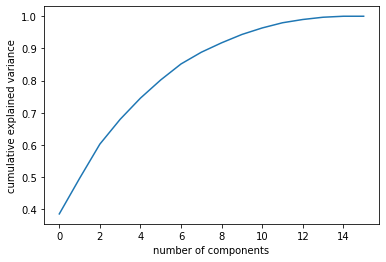

In [127]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

## Dimensionality Reduction

In [128]:
num_components = 6
pca = PCA(num_components)  
X_pca = pca.fit_transform(X_std) # fit and reduce dimension

## Important feature set

In [129]:
pd.DataFrame(pca.components_, columns = CA_superset_data_filtered.columns)


,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,X..staying.home,Trips.person,X..out.of.county.trips,X..out.of.state.trips,Miles.person,Work.trips.person,Non.work.trips.person,X..working.from.home,New cases,New.cases.1000.people
0,-0.355174,-0.305326,-0.176748,-0.297669,-0.294247,0.337365,0.357582,-0.343634,-0.011772,-0.063353,-0.260710,-0.144027,-0.334380,0.090756,0.022433,-0.031920
1,-0.064540,-0.115365,0.133581,0.021098,-0.071780,-0.022071,-0.002618,-0.022963,0.245324,0.245651,0.358346,-0.410399,0.110501,0.538788,0.242771,0.423384
2,0.010465,-0.103520,-0.387098,-0.148817,-0.137783,0.110212,-0.159362,0.208966,-0.384772,-0.258577,0.069784,0.318246,0.126944,0.000277,0.438273,0.433277
3,0.057771,-0.023104,-0.189322,0.057132,0.514882,-0.390780,0.209564,-0.260429,-0.260028,0.032023,-0.099159,-0.387767,-0.161155,-0.251040,0.298042,0.144260
4,0.066013,-0.068600,-0.251548,0.063793,-0.044750,0.120915,-0.017682,-0.073477,0.454478,0.553962,0.105561,0.264244,-0.169273,-0.466987,0.122024,0.212706
5,0.159234,0.387002,0.557021,0.094070,-0.179859,0.079607,0.054131,-0.170328,-0.018323,-0.011110,-0.293179,0.171699,-0.246277,0.010760,0.495923,0.111904


In [130]:

n_pcs= pca.n_components_ # get number of component
# get the index of the most important feature on EACH component
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]
initial_feature_names = CA_superset_data_filtered.columns
# get the most important feature names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

In [131]:
most_important_names

['X..staying.home',
 'X..working.from.home',
 'New cases',
 'workplaces_percent_change_from_baseline',
 'X..out.of.state.trips',
 'parks_percent_change_from_baseline']

In [132]:
print(" initial_feature_names : ",initial_feature_names)

print("most_important_names: ", most_important_names)

print(len(initial_feature_names) - len(most_important_names))

 initial_feature_names :  Index(['retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline', 'X..staying.home',
       'Trips.person', 'X..out.of.county.trips', 'X..out.of.state.trips',
       'Miles.person', 'Work.trips.person', 'Non.work.trips.person',
       'X..working.from.home', 'New cases', 'New.cases.1000.people'],
      dtype='object')
most_important_names:  ['X..staying.home', 'X..working.from.home', 'New cases', 'workplaces_percent_change_from_baseline', 'X..out.of.state.trips', 'parks_percent_change_from_baseline']
10


# Conclusion for superset dataset analysis:

From the above PCA analysis, we can drop the following columns from Time-series forecasting

1. Demographic Group:
>* 'X..people.older.than.60', 
>* 'Median.income', 
>* 'X..Male', 
>* 'New cases', 
>* 'FIPS', 
>* 'X..African.Americans', 
>* 'PopDensity'

2. Hospitalization and testing Group:
>* 'X..hospital.bed.utilization', 
>* 'Testing.capacity'

3. Mobility Group:
>* 'X..staying.home',
>* 'X..working.from.home', 
>* 'New cases', 
>* 'workplaces_percent_change_from_baseline',
>* 'X..out.of.state.trips', 
>*  'parks_percent_change_from_baseline'

# Reference

* https://medium.com/@ansjin/dimensionality-reduction-using-pca-on-multivariate-timeseries-data-b5cc07238dc4